## Exercise 3.1

In [1]:
from Definitions import *

A property of a molecule closely related to its moments of inertia is its radius of gyration, **Rgyr** , which is defined as where **Rc** is the centre of the molecule calculated with the same weights as
those used for the calculation of **Rgyr** . Write a function that calculates this quantity and use it to analyse the molecules examined in Example 4.

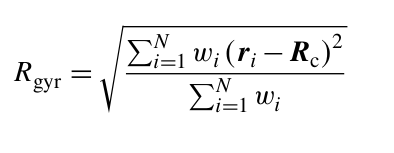

First we need to calculate the **Rc**, which is the center of mass if we use the massess of our atoms. So, writing a funciton to calculat the **Rc** we need to first store the masses from the atoms in our molecule. 

In [2]:
from math import sqrt

def rgyr(molecule):
        # Calculate the masses in the system
    weights_mol = Array.FromIterable([atom.mass for atom in molecule.atoms])
    
    # Rc = vector of coordinates for the center of the molecule
    Rcenter = molecule.coordinates3.Center(weights = weights_mol)

    # Calculate the Rgyr:
    numerator = 0
    denominator = sum(weights_mol)
    
    #Euclidean distance of (Ri - Rc)**2
    for atom in range(molecule.coordinates3.rows):
        distance_x = (molecule.coordinates3[atom][0] - Rcenter[0])**2
        distance_y = (molecule.coordinates3[atom][1] - Rcenter[1])**2
        distance_z = (molecule.coordinates3[atom][2] - Rcenter[2])**2

        euclidean_distance = (sqrt(distance_x + distance_y + distance_z))**2
        
        #weighted sum and store it
        numerator += weights_mol[atom]*euclidean_distance

    return sqrt(numerator/denominator)

In [3]:
# Import the molecule
# Define the list of structures
xyzFiles = ["bala_alpha.xyz", "bala_c5.xyz", "bala_c7ax.xyz", "bala_c7eq.xyz"]

for xyzFile in xyzFiles:
    molecule = ImportSystem(os.path.join(xyzPath, xyzFile))
    print(f"{xyzFile}: {rgyr(molecule):.3f}")


System imported from "~/simulacao_iq/pDynamo3-main/examples/book/data/xyz/bala_alpha.xyz" in XYZ format.
bala_alpha.xyz: 2.450

System imported from "~/simulacao_iq/pDynamo3-main/examples/book/data/xyz/bala_c5.xyz" in XYZ format.
bala_c5.xyz: 2.495

System imported from "~/simulacao_iq/pDynamo3-main/examples/book/data/xyz/bala_c7ax.xyz" in XYZ format.
bala_c7ax.xyz: 2.261

System imported from "~/simulacao_iq/pDynamo3-main/examples/book/data/xyz/bala_c7eq.xyz" in XYZ format.
bala_c7eq.xyz: 2.301
